# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

In this first notebook we want to test the Pseudo-Random Number generator downloaded from the NSL Ariel web site.
On such Number Generator are based all the exercises presented, and through the use of this tool, we get to one of the central points of the course:
to show the usefulness and the fundamental importance of stochastic approaches when facing very complex phenomena where uncertainties or stochastic components are involved in the equations or, provided that the solutions can be represented in terms of probability distributions of random variables, when facing deterministic problem that would be intractable with classical deterministic methods of resolutions.


The technique we use throughout the whole course is Monte Carlo method, i.e. a class of random sampling methods. Although the results obtained by using such method are statistical and subject to the laws of chance, we can determine the precision of the answer obtained and improve the precision increasing the number of samplings.$\\$
A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, so, before solving the exercises, is good to linger on the blocking method; in fact, in order to estimate a certain variable $A$, we use a large number of throws $M$ and divide them in $N$ arbitrary blocks (a limitation on the choice of the number of blocks $N$ is the fact that it has to be a divisor of $M$). For each block, we use $M/N$ Monte Carlo "steps" to obtain an estimate of $A$ and an estimate of its variance $\sigma^2_A$. Furthermore, in the next code cell, we define two functions that will be useful during the estimations performed throughout this notebook: an <font color="blue">error</font> function, useful to estimate the statistical uncertainty and an <font color="blue">observable</font> function useful to have the values extracted from the blocks as new observables of interest.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re #library useful to the reading of all the numbers in a file.dat
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
#from lmfit.models import LorentzianModel

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0: 
        return 0 #it is not possible to compute the error if we have just one block: we put the error equal to zero
    else:
        return np.sqrt((AV2 - AV**2)/n)


def observable(data): #function useful to the creation of the averages and the relative errors in the blocking method
    sum_prog = 0.
    sum2_prog = 0.
    val = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        ave = sum_prog / (i+1)
        ave2 = sum2_prog / (i+1)
        val[i, 0] = ave
        val[i, 1] = error(ave,ave2,i)
    return val   

### Exercise 01.1


In particular, in the first exercise we want to make a picture of estimation of  $\langle r \rangle$ defined as: $$\langle r \rangle = \int_0^1 r dr = 1/2,$$ and of $\sigma^2$, defined as: $$\int_0^1 (r-1/2)^2 dr = 1/12$$ and their uncertainties, which correspond respectively to Standard Deviation of the mean for the estimation of $\langle r \rangle$ and to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$. We make such estimation with a large number of *throws* $M$ as a function of the number of blocks, $N$, using the <font color="blue">blocking method</font>. Finally, we perform the $\chi^2$ test.

In [2]:
#Get information from file about the pseudo random generation
file = open("data/info_ex1.1.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/info_ex1.1.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file) #find the numbers in the file and store them in a vector s

#Read data from file
data = np.loadtxt("data/ex1.1.dat")

Number of blocks: 100

Number of throws: 1000000

Number of throws per block: 10000



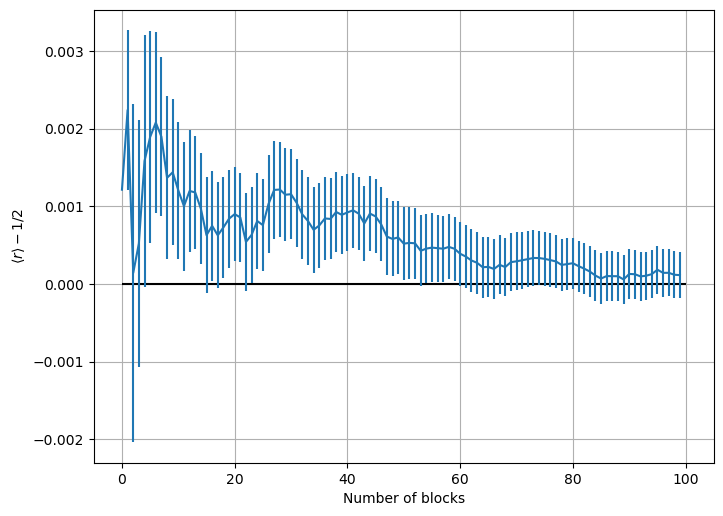

In [3]:
x = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y = observable(data[:,0])
          
figure(figsize=(8, 6), dpi=100)
plt.hlines(0,0,100, color = "black")
plt.errorbar(x,y[:,0]-0.5,yerr=y[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle r \rangle-1/2$")
plt.grid(True)
plt.show()

In the plot above, we show the trend of the expectation value $\langle r \rangle$ as function of the number of blocks. Being that we know the result a priori, we plot the values of $\langle r \rangle - \frac{1}{2}$. 
As showed, after 100 blocks, we obtain: $$\langle r \rangle = 0.5001 \pm 0.0003. $$
The result is in agreement with the theory.

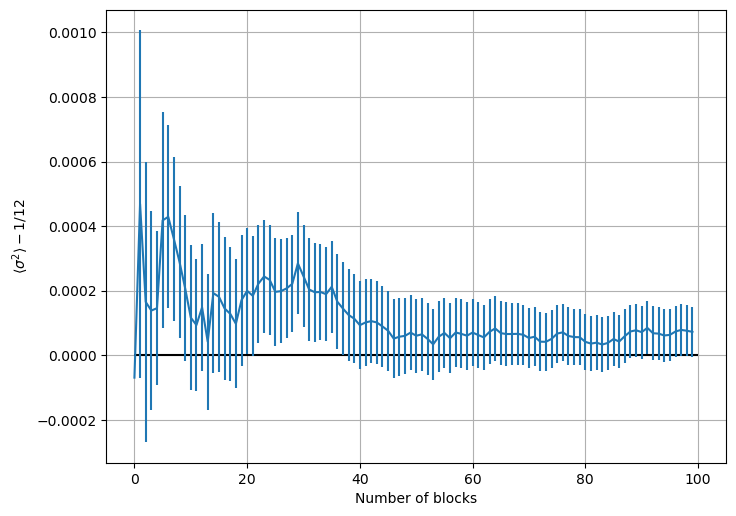

In [4]:
x = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y = observable(data[:,1])

figure(figsize=(8, 6), dpi=100)
plt.hlines(0,0,100, color = "black")
plt.errorbar(x,y[:,0]-1/12,yerr=y[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle \sigma^2 \rangle-1/12$")
plt.grid(True)
plt.show()

Also in this case we show the trend of the expected value as a function of the number of blocks $N$. As before, knowing the result, we perform a translation of the values on the y axis, plotting $\langle \sigma^2 \rangle-1/12$. After $M = 1000000$ throws divided in $100$ blocks, we get: $$ \langle \sigma^2 \rangle =  0.08341 \pm 0.00008 $$
Thus, we obtain a value compatible with the theory.

Finally, we want to perform the $\chi^2$ test in order to verify if the number are uniformly extracted. This test is necessary since we are using a deteministic algorithm in order to generate random numbers and so, strictly speaking, our extracted numbers are only pseudo-random. 
Thus, performing this test, we want to reject the hypotesis that the distribution of our number is not uniform.
We do this not only for the numbers in the first block, but for all the numbers extracted.
We divide $[ 0, 1 ]$ in $I = 100$ identical sub-intervals: in this way we have that the number of expected events (i.e. the extraction of a number which belong to a certain sub-interval) after $n$ extractions is $\frac{n}{I} = E_i$ and is equal for all the sub-intervals. Calling $O_i$ the number of observed event in the i-th interval, we have: $$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}.$$
From this relation, performing some passages and exploiting the knowledge about the Binomial distribution, we expect on average $\frac{n}/{I}$ and so $\chi^2 \simeq 100$.
A larger value of $\chi^2$ could indicate that the hypothesis (numbers are drawn from a uniform distribution) is rather unlikely.

Number of blocks with $\chi^2$ a 75.46: 6.0
Number of blocks with $\chi^2$ a 81.63: 14.0
Number of blocks with $\chi^2$ a 87.8: 19.0
Number of blocks with $\chi^2$ a 93.97: 17.0
Number of blocks with $\chi^2$ a 100.14: 15.0
Number of blocks with $\chi^2$ a 106.31: 8.0
Number of blocks with $\chi^2$ a 112.48: 9.0
Number of blocks with $\chi^2$ a 118.65: 7.0
Number of blocks with $\chi^2$ a 124.82: 2.0
Number of blocks with $\chi^2$ a 130.99: 3.0


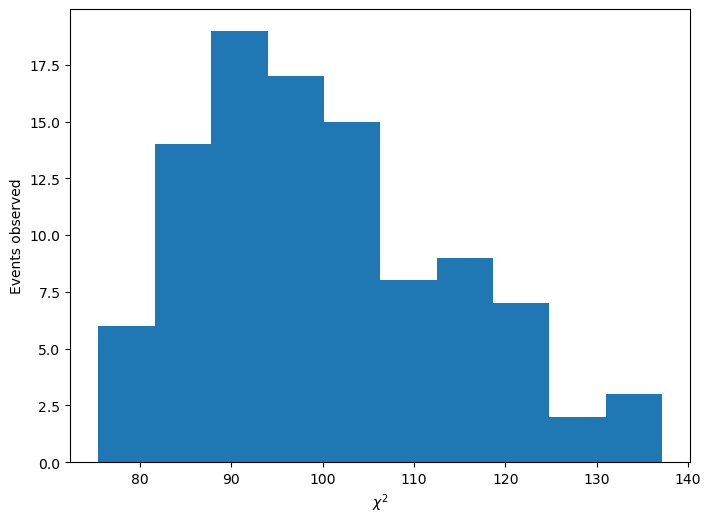

In [5]:
figure(figsize=(8, 6), dpi=100)
c = plt.hist(data[:,2])
plt.xlabel(r"$\chi^2$")
plt.ylabel(r"Events observed")
counters = []
values = []
counters = c[0]
values = c[1]
for i in range(10):
    print("Number of blocks with $\chi^2$ a " + str(round(values[i],2)) + ": " + str(counters[i]))


In the histogram above is showed the distribution of the $\chi^2$ values. We observe that there is a significant number of blocks with $\chi^2 > 100$. In particular, from the $\chi^2$ tables we can see that the probability of non-surpassing $135$ is $0.99$, and so we are not able to reject the hypotesis that the numbers are not generated from a uniform distribution.

### Exercise 01.2

 In this second exercise we want to extend Pseudo-Random Number generator and check the Central Limit Theorem, showing the trend of the histograms shifting towards the limit distribution as the number of the random variable increases.
Such theorem answers to the question of what is the distribution of the sum of different random variables.

We also wanto to underline that, since at the basis of the scientific method there is the possibility to falsify an hypothesis, such theorem acquires a tremendously important role: it states that we can gradually increase the number of measurements to obtain greater precision and falsify the hypotheses.

As far as the exercise is concerned, we build three different dices and evaluate $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice and a *Lorentzian* dice. 
 Our goal is to verify the convergence to the basin of attraction of $S_n$ for such different cases.

#### Normal dice

In [6]:
# Read information about the throws of dices from info file
file =open("data/info_ex1.2.dat")
for i in file.readlines():
    print(i)
file.close()

info = open("data/info_ex1.2.dat", "r")
info = info.read()
num_file = re.findall(r"[-+]?\d*\.\d+|\d+", info)

N = num_file[0]
N_sums = [int(num_file[i]) for i in range(1,5)]

#Read data from file
dataUNIF = np.loadtxt("data/ex1.2UNIF.dat")
dataEXP = np.loadtxt("data/ex1.2EXP.dat")
dataLOR = np.loadtxt("data/ex1.2LOR.dat")

Number of throws: 10000

Number of dices summed up: 1	2	10	100



[]

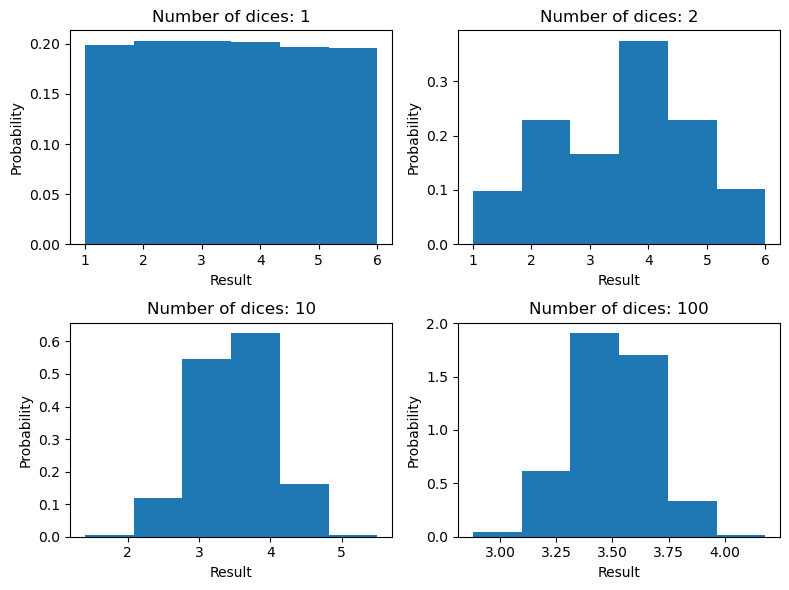

In [7]:
#print the histograms for normal dices
figure(figsize=(8, 6), dpi=100)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(f"Number of dices: {N_sums[i]}")
    plt.xlabel(r"Result")
    plt.ylabel(r"Probability")
    plt.hist(dataUNIF[:,i], bins=6, density = True)
plt.tight_layout()
plt.plot()

In the histograms above we show the trend of the probability distribution as the number of dices increases.
Inter alia, we know that a normal and not rigged dice has 6 possible outcomes, all equiprobable with probability $p=\frac{1}{6}$. The average value is $ave = \langle x_i \rangle =  \frac{1}{n}\sum_{i=1}^n x_i = 3.5$, being $n = 1, \dots,  6$.
The variance is $\sigma^2_{x_i} = \frac{35}{12}$ and thus $\sigma_{x_i} = \sqrt{\frac{35}{12}} \simeq 1.707$.
For these reasons, we expect that the probability distribution for a normal dice tends to a Gaussian distribution with a mean $\mu = \langle x_i \rangle = 3.5 $ and a variance $ \sigma^2 = \frac{\sigma^2_{x_i}}{N}= 0.486$.

In the next cell we perform a fit to the last distribution obtained form the throw of 100 dices. In order to make the fit nicer, we increase the number of bins from 6 to 100 and take their medium point as the point to fit.

optimized parameters [a,x_0,sigma] =
[ 2.3233356   3.49958625 -0.17194347]
parameters uncertainty =
[0.05318659 0.0045451  0.00454524]


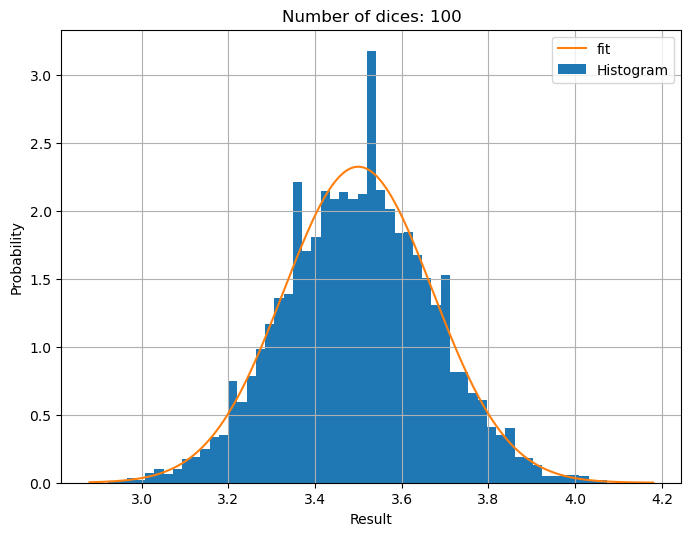

In [8]:
figure(figsize=(8, 6), dpi=100)
plt.title(f"Number of dices: {N_sums[3]}")
    
def gauss_function(x, a, x0, sigma):  # defining the fitting function for the histogram with 100 dices 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#set the data to fit 
x = dataUNIF[:,3]  #we take last column since it is the column relative to the case with 100 dices

#set the height and width of bins and calculate the center of the bins: it will be the xdata taken by the fit function
bin_heights, bin_borders = np.histogram(x, bins='auto', density = True)
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

#fit the curve to the histogram
p_opt, p_cov = curve_fit(gauss_function, bin_centers, bin_heights, p0=[1,3,0.1], maxfev=5000) #maxfev is the max number of iterations used by scipy to fit the curve

#generate enough values in order to make the fitting curve looks smooth
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

#plot the histogram and the fitted curve 
plt.bar(bin_centers, bin_heights, width=bin_widths, label="Histogram")
plt.grid(True)
plt.plot(x_interval_for_fit, gauss_function(x_interval_for_fit, *p_opt), label='fit', color = "C1")
plt.xlabel(r"Result")
plt.ylabel(r"Probability")
plt.legend()

print("optimized parameters [a,x_0,sigma] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

Exploiting the results obtained form the fit, we can confirm that the probability distribution tends to a gaussian distribution, whom values are in agreement to the ones predicted by the central limit theorem:
$$\mu = 3.500 \pm 0.005 \, \, \, \textit{and} \, \, \,  \sigma = 0.172 \pm 0.005$$ 

#### Exponential dice 

The exponential distribution is defined as $$ p(x) = \lambda \exp{-\lambda x}$$. It has expectation value $\langle x_i \rangle = \frac{1}{\lambda}$ and variance $\sigma^2_{x_i} = \frac{1}{\lambda^2}$. In this fashion the limit distribution is expected to have mean $\mu = \langle x_i \rangle = \frac{1}{\lambda}$ and a variance $\sigma^2_{x_i} = \frac{1}{\lambda^2 N}$. Thus, supposing to have $\lambda = 1$, we expect that the limit distribution is a Gaussian distribution with mean equal to $1$ and $\sigma$ equal to $0.01$.

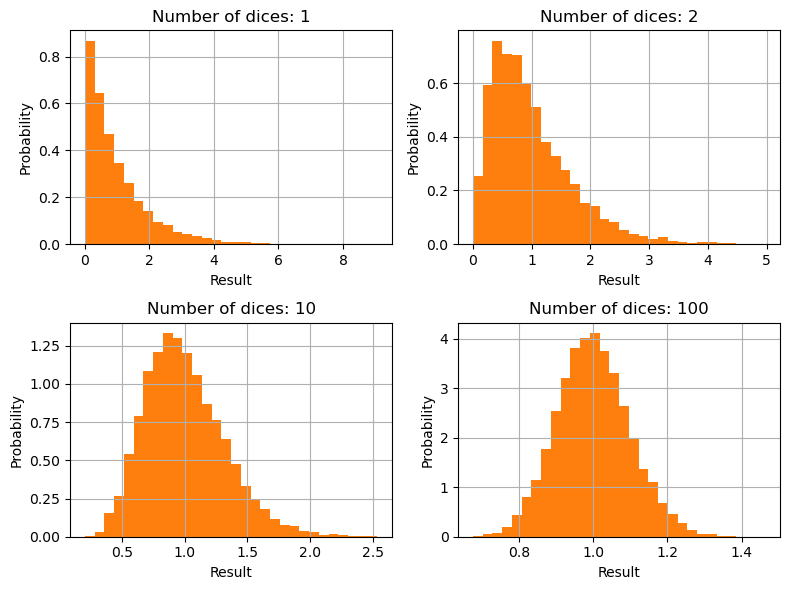

In [9]:
#print the histograms for exponential dices
figure(figsize=(8, 6), dpi=100)
plt.grid(True)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(f"Number of dices: {N_sums[i]}")
    plt.hist(dataEXP[:,i], bins=30, density = True, color = "C1")
    plt.grid(True)
    plt.xlabel(r"Result")
    plt.ylabel(r"Probability")
plt.tight_layout()

plt.plot();

optimized parameters [a,x_0,sigma] =
[ 4.10921366  0.99548288 -0.09643668]
parameters uncertainty =
[0.04302491 0.0011659  0.00116609]


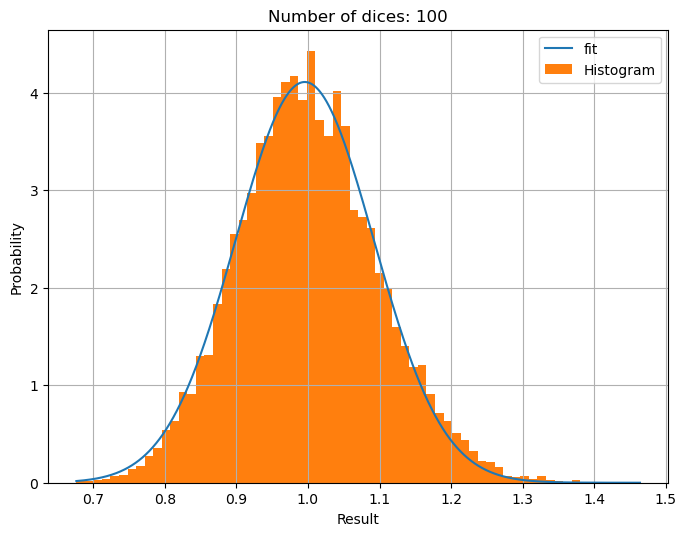

In [10]:
figure(figsize=(8, 6), dpi=100)
plt.title(f"Number of dices: {N_sums[3]}")
    
def gauss_function(x, a, x0, sigma):  # defining the fitting function for the histogram with 100 dices 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#set the data to fit 
x = dataEXP[:,3] #we take last column since it is the column relative to the case with 100 dices



#set the height and width of bins and calculate the center of the bins: it will be the xdata taken by the fit function
bin_heights, bin_borders = np.histogram(x, bins='auto', density = True)
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

#fit the curve to the histogram
p_opt, p_cov = curve_fit(gauss_function, bin_centers, bin_heights)

#generate enough values in order to make the fitting curve looks smooth
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

#plot the histogram and the fitted curve 
plt.bar(bin_centers, bin_heights, width=bin_widths, label="Histogram", color = "C1")
plt.grid(True)
plt.plot(x_interval_for_fit, gauss_function(x_interval_for_fit, *p_opt), label='fit')
plt.xlabel(r"Result")
plt.ylabel(r"Probability")
plt.legend()

print("optimized parameters [a,x_0,sigma] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

Also in this case with the fit we obtain values in agreement with the predictions of the cetral limit theorem:
$$\mu = 0.995 \pm 0.001 \, \, \, \textit{and} \, \, \,  \sigma = 0.096 \pm 0.001$$ 

#### Lorentzian dice

The last kind of dice analyzed follows the Cauchy-Lorentz distribution defined as: $$p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2+\Gamma^2}.$$ In this case we cannot observe a convergence to a Gaussian distribution, since it has an infinite variance, but it is possible to find another limit distribution, which is the same Cauchy-Lorent distribution.
In particular, we consider the case with $\mu = 0$ and $\Gamma = 1$

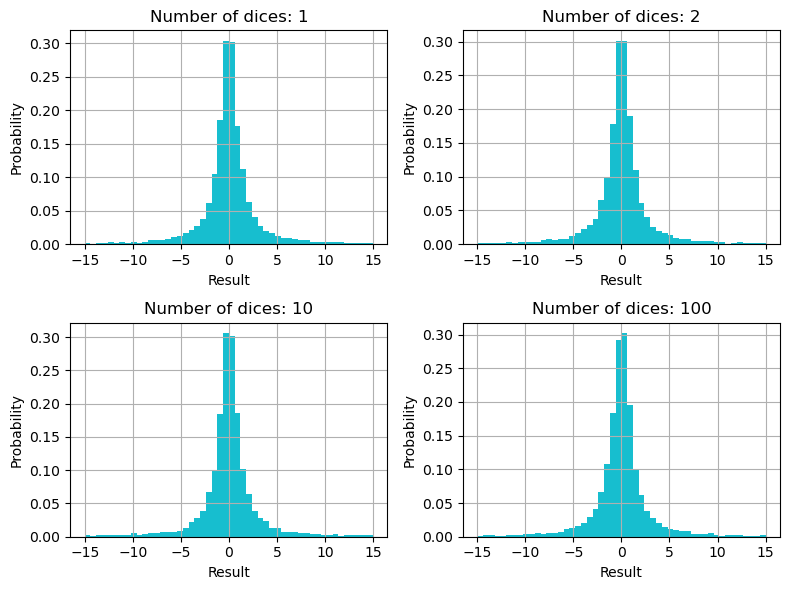

In [11]:
#print the histograms for lorentzian dices
figure(figsize=(8, 6), dpi=100)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(f"Number of dices: {N_sums[i]}")
    plt.hist(dataLOR[:,i], bins=50, range=(-15, 15), color = "C9", density = True)
    plt.grid(True)
    plt.xlabel(r"Result")
    plt.ylabel(r"Probability")
plt.tight_layout()
plt.plot();

Optimized parameters [mu,gamma] =
[0.02194989 0.96156015]
Parameters uncertainty =
[0.00730509 0.00730595]


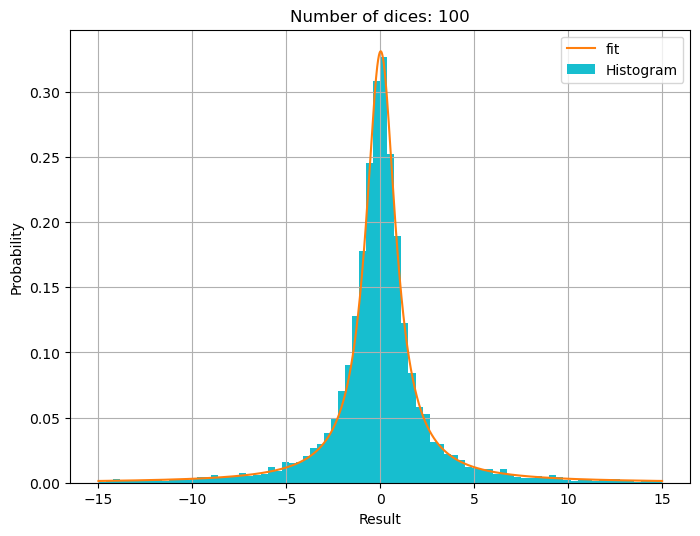

In [12]:
figure(figsize=(8, 6), dpi=100)
plt.title(f"Number of dices: {N_sums[3]}")
plt.hist(dataLOR[:,3], bins=80, range=(-15, 15), density = True, label = "Histogram", color = "C9")

def lorentz_function(x, x0, gamma):  # defining the fitting function for the histogram with 100 dices 
    return  1/np.pi * gamma/((gamma**2 + (x-x0)**2))

#set the data to fit
x = dataLOR[:,3] #we take last column since it is the column relative to the case with 100 dices 

#set the height and width of bins and calculate the center of the bins: it will be the xdata taken by the fit function
bin_heights, bin_borders = np.histogram(x, 100, range = (-15, 15), density = True )
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

#generate enough values in order to make the fitting curve looks smooth
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)


p_opt, p_cov = curve_fit(lorentz_function, bin_centers, bin_heights) 
plt.plot(x_interval_for_fit,lorentz_function(x_interval_for_fit,p_opt[0],p_opt[1]),color="C1", label = "fit")

print("Optimized parameters [mu,gamma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))   
plt.legend()
plt.xlabel(r"Result")
plt.ylabel(r"Probability")
plt.grid(True)
plt.show()

Again, with the fit we obtain values in agreement with the predictions of the cetral limit theorem:
$$\mu = 0.026 \pm 0.008 \, \, \, \textit{and} \, \, \,  \sigma = 0.079 \pm 0.008$$ 

In conclusion, we can confirm that the Central Limit Theorem holds for the cases studied and that in particular the uniform and the exponential distributions are in the basin of attraction of the Gaussian distribution. On the contrary, the Cauchy-Lorentz distribution belongs to the basin of attraction of the homonym distribution.

### Exercise 01.3

In this third and last exercise we want to do a simulation of the Buffon's Experiment. We want to make a picture of the estimation of $\pi$ and its uncertainty, which corresponds to the standard deviation of the mean, with a large number of throws $N_{throws}=10000$ for each block as a function of the number of blocks $N_{blocks}=100$. 

The idea behind the simulation is the following: firstly, supposing to be between two lines that are distant 1, we generate a random number considering it as the $x$ coordinate of the initial endpoint of the needle starting from the first line. Clearly, the needle can fall parallel to the lines as it can fall perpendicular to them. In order to estimate the angle $\theta \in [0, \pi)$ with respect to the parallel configuration, we generate two random coordinates $x$ and $y$ in a semi-circumference and use the $\arccos$ function, defined as: $$\theta = \arccos{\frac{x}{x^2+y^2}}$$ for $y \geq 0$.
This strategy is necessary since we cannot resort to $\pi$ to estimate $\pi$.
Called the first endpoint $a$, if $a$ or the final endpoint $b = a + L\sin{\theta}$ touch or go beyond a line, then we increment the counter $N_{hit}$. At this point the estimation of $\pi$ can be performed: 
$$\pi = \lim_{N_{throws}\to \infty }\frac{2L N_{throws}}{N_{hit}d}$$




In [13]:
#Get information from file about the generation
file = open("data/info_ex1.3.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/info_ex1.3.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)

#Read data from file
data = np.loadtxt("data/ex1.3.dat")

Number of blocks: 100

Number of throws per block: 10000



We choose $d=1$ as distance between the lines and $L=0.6$ as the lenght of the needle.

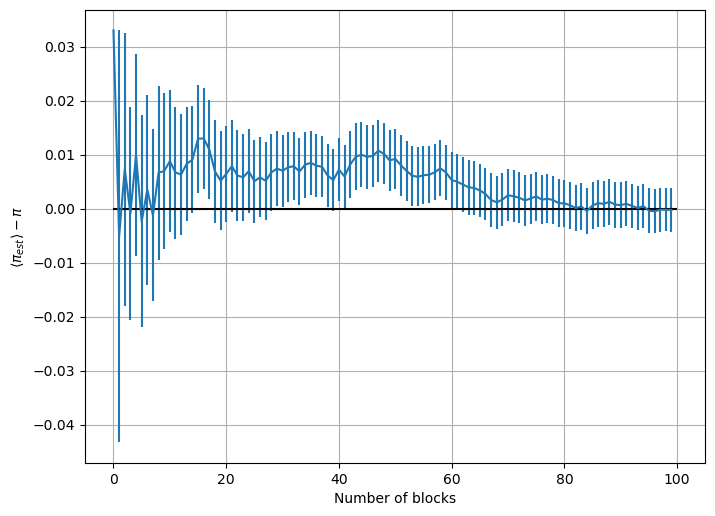

In [14]:
x = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y = observable(data)
          
figure(figsize=(8, 6), dpi=100)
plt.errorbar(x,y[:,0]-np.pi,yerr=y[:,1])
plt.hlines(0,0,100,label="$\pi$", color = "black")
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle \pi_{est} \rangle-\pi$")
plt.grid(True)
plt.show()

In the plot above is represented the trend of the estimate of $\pi$ as a function of the number of blocks. We obtain a result in perfect agreement with the theory: $$ \pi_{est} = 3.141 \pm 0.004 $$